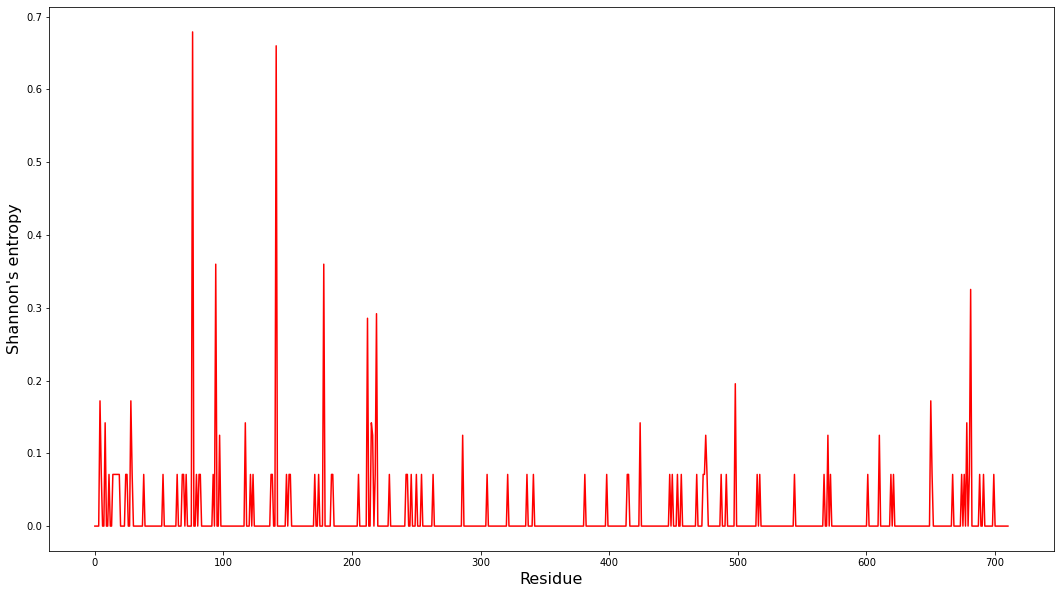

In [10]:
'''This file generates the fourth feature for the model training. The details about the feature can be found in
features.pdf'''

#importing the relevant packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
from Bio import AlignIO
import warnings
warnings.filterwarnings("ignore")

#function to calculate the Shannon Entropy of a MSA
# H = -sum[p(x).log2(px)]

def shannon_entropy(list_input):
    unique_aa = set(list_input)   
    M = len(list_input)
    entropy_list = []
    # Number of residues in column
    for aa in unique_aa:
        n_i = list_input.count(aa)                                           
        P_i = n_i/float(M)                                
        entropy_i = P_i*(math.log(P_i,2))
        entropy_list.append(entropy_i)
    sh_entropy = -(sum(entropy_list))
    #print(sh_entropy)
    return sh_entropy

#importing the MSA file
#importing the clustal file
align_clustal1 = AlignIO.read("/home/satyam/Documents/Mutation_Prediction/Delta/Training_Data_20oct/Final_185/delta_117_seq_clustalw.aln", "clustal")

def shannon_entropy_list_msa(alignment_file):
    shannon_entropy_list = []
    for col_no in range(len(list(alignment_file[0]))):
        list_input = list(alignment_file[:, col_no])
        shannon_entropy_list.append(shannon_entropy(list_input))
    return shannon_entropy_list

clustal_omega1 = shannon_entropy_list_msa(align_clustal1)

#print(clustal_omega1)
# Plotting the data
plt.figure(figsize=(18,10))
plt.plot(clustal_omega1, 'r')
plt.xlabel('Residue', fontsize=16)
plt.ylabel("Shannon's entropy", fontsize=16)
#plt.legend()
plt.show()

In [13]:
import csv
list1 = np.arange(0,711)
list2 = clustal_omega1[0:711]
with open('/home/satyam/Documents/Mutation_Prediction/foo.csv', "w") as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        writer.writerow(['A', 'B'])
        for i in range(len(list1)):
            writer.writerow([list1[i],list2[i]])